---
### Universidad de Costa Rica
#### IE0405 - Modelos Probabilísticos de Señales y Sistemas

Segundo semestre del 2021

* Estudiante: **Juan Ignacio Montealegre Salazar**
* Carné: **B95001**
* Grupo: **1**

# `L4` - *Procesos aleatorios*


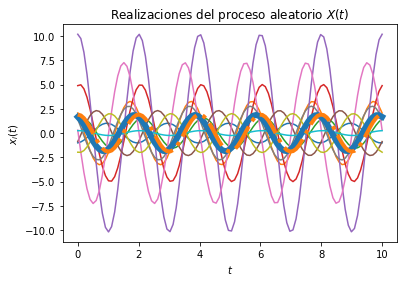

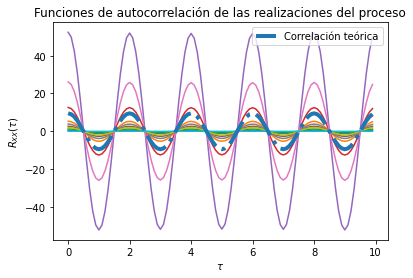

In [1]:
# Base para la solución del Laboratorio 4

# Los parámetros T, t_final y N son elegidos arbitrariamente

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Variables aleatorias A y Z
vaA = stats.norm(3, np.sqrt(10))
vaZ = stats.uniform(-np.pi/2, np.pi)

# Creación del vector de tiempo
T = 100			# número de elementos
t_final = 10	# tiempo en segundos
t = np.linspace(0, t_final, T)

# Inicialización del proceso aleatorio X(t) con N realizaciones
N = 10
X_t = np.empty((N, len(t)))	# N funciones del tiempo x(t) con T puntos

# Creación de las muestras del proceso x(t) (A y Z independientes)
for i in range(N):
	A = vaA.rvs()
	Z = vaZ.rvs()
	x_t = A * np.cos(np.pi*t + Z)
	X_t[i,:] = x_t
	plt.plot(t, x_t)

# Promedio de las N realizaciones en cada instante (cada punto en t)
P = [np.mean(X_t[:,i]) for i in range(len(t))]
plt.plot(t, P, lw=6)

# Graficar el resultado teórico del valor esperado
E = 6/np.pi * np.cos(np.pi*t)
plt.plot(t, E, '-.', lw=4)

# Mostrar las realizaciones, y su promedio calculado y teórico
plt.title('Realizaciones del proceso aleatorio $X(t)$')
plt.xlabel('$t$')
plt.ylabel('$x_i(t)$')
plt.show()

# T valores de desplazamiento tau
desplazamiento = np.arange(T)
taus = desplazamiento/t_final

# Inicialización de matriz de valores de correlación para las N funciones
corr = np.empty((N, len(desplazamiento)))

# Nueva figura para la autocorrelación
plt.figure()

# Cálculo de correlación para cada valor de tau
for n in range(N):
	for i, tau in enumerate(desplazamiento):
		corr[n, i] = np.correlate(X_t[n,:], np.roll(X_t[n,:], tau))/T
	plt.plot(taus, corr[n,:])

# Valor teórico de correlación
Rxx = 19/2 * np.cos(np.pi*taus)

# Gráficas de correlación para cada realización y la
plt.plot(taus, Rxx, '-.', lw=4, label='Correlación teórica')
plt.title('Funciones de autocorrelación de las realizaciones del proceso')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$R_{XX}(\tau)$')
plt.legend()
plt.show()

Valor teórico de la media E: 
[ 3.18309886  2.75453394  2.28164754  1.77204857  1.23393668  0.67597029
  0.10712728 -0.46343945 -1.02654926 -1.57314151 -2.09442133 -2.58200112
 -3.02803555 -3.42534775 -3.76754482 -4.04912069 -4.26554469 -4.41333448
 -4.49011207 -4.49464207 -4.4268516  -4.28783142 -4.07981844 -3.80615965
 -3.47125833 -3.08050316 -2.64018154 -2.15737841 -1.63986226 -1.09596011
 -0.53442355  0.03571209  0.6052731   1.16509505  1.70617017  2.21979238
  2.69769731  3.13219527  3.51629503  3.8438163   4.10948912  4.30903872
  4.43925427  4.49804057  4.4844517   4.39870633  4.24218413  4.0174036
  3.72798154  3.37857486  2.97480565  2.5231707   2.03093699  1.50602474
  0.95687999  0.39233869 -0.1785155  -0.7464973  -1.30246768 -1.83748087
 -2.3429283  -2.81067714 -3.23320113 -3.6037017  -3.91621737 -4.16571963
 -4.34819391 -4.46070411 -4.50143992 -4.46974588 -4.36613195 -4.19226532
 -3.95094357 -3.64604967 -3.28248946 -2.86611276 -2.40361924 -1.90245058
 -1.37067079 -0.816836

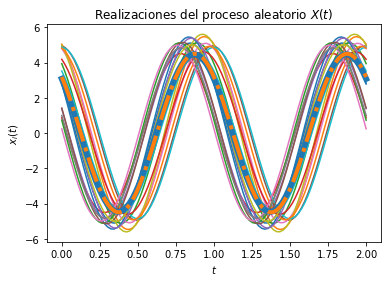

Valor teórico de la correlación Rxx: 
[ 1.23858200e+01 -9.22867730e+00  6.28764517e+00 -3.75125137e+00
  1.78208534e+00 -5.06375738e-01  5.89886057e-03 -3.12736575e-01
  1.40721979e+00 -3.21918928e+00  5.63249311e+00 -8.49243222e+00
  1.16156771e+01 -1.48020196e+01  1.78472070e+01 -2.05560347e+01
  2.27548600e+01 -2.43027324e+01  2.51004292e+01 -2.50968160e+01
  2.42921245e+01 -2.27379375e+01  2.05338823e+01 -1.78212446e+01
  1.47739116e+01 -1.15872253e+01  8.46546039e+00 -5.60873024e+00
  3.20015863e+00 -1.39414127e+00  3.06448561e-01 -6.80442639e-03
  5.14416835e-01 -1.79674651e+00  3.77159280e+00 -6.31236291e+00
  9.25618690e+00 -1.24143580e+01  1.55844292e+01 -1.85631908e+01
  2.11596963e+01 -2.32075031e+01  2.45753414e+01 -2.51755292e+01
  2.49695929e+01 -2.39707336e+01  2.22429807e+01 -1.98970877e+01
  1.70834325e+01 -1.39823776e+01  1.07927086e+01 -7.71889181e+00
  4.95796668e+00 -2.68691574e+00  1.05131924e+00 -1.56023177e-01
  5.84183461e-02 -7.64761472e-01  2.22977413e+00 -4.

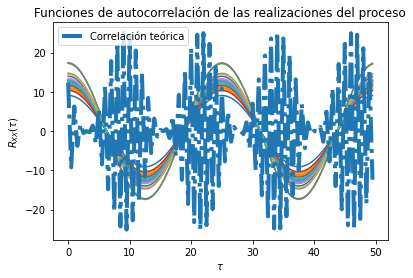

In [2]:
#Código base modificado para solucionar problema 4 de de la práctica E13
'''
Parte a) Suponiendo que Ω no es una variable aleatoria, 
sino una constante omega. Encuentre el valor medio
 Los parámetros T, t_final y N son elegidos arbitrariamente
'''
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Variables aleatorias C y Z
vaC = stats.norm(5, np.sqrt(0.2))
vaZ = stats.uniform(0, np.pi/2)

#Constante Omega
Omega = 2*np.pi

# Creación del vector de tiempo
T = 100			# número de elementos
t_final = 2# tiempo en segundos
t = np.linspace(0, t_final, T)

# Inicialización del proceso aleatorio X(t) con N realizaciones
N = 20
X_t = np.empty((N, len(t)))	# N funciones del tiempo x(t) con T puntos

# Creación de las muestras del proceso x(t) (C y Z independientes)
for i in range(N):
	C = vaC.rvs()
	Z = vaZ.rvs()
	x_t = C * np.cos(Omega*t + Z)
	X_t[i,:] = x_t
	plt.plot(t, x_t)

# Promedio de las N realizaciones en cada instante (cada punto en t)
P = [np.mean(X_t[:,i]) for i in range(len(t))]
plt.plot(t, P, lw=6)

# Graficar el resultado teórico del valor esperado
E = (10/np.pi) * (np.cos(Omega*t)-np.sin(Omega*t))
print ("Valor teórico de la media E: ")
print(E)
plt.plot(t, E, '-.', lw=4)

# Mostrar las realizaciones, y su promedio calculado y teórico
plt.title('Realizaciones del proceso aleatorio $X(t)$')
plt.xlabel('$t$')
plt.ylabel('$x_i(t)$')
plt.show()

'''Parte b) Suponga ahora que Ω y Θ son constantes, no variables aleatorias
Obtenga el valor teórico de la correlación'''
Z = 0

# Se redifinen las muestras del proceso x(t) (C y Z independientes)
for i in range(N):
	C = vaC.rvs()
	Z = vaZ.rvs()
	x_t = C * np.cos(Omega*t + Z)
	X_t[i,:] = x_t

    

# T valores de desplazamiento tau
desplazamiento = np.arange(T)
taus = desplazamiento/t_final

# Inicialización de matriz de valores de correlación para las N funciones
corr = np.empty((N, len(desplazamiento)))

# Nueva figura para la autocorrelación
plt.figure()

# Cálculo de correlación para cada valor de tau
for n in range(N):
	for i, tau in enumerate(desplazamiento):
		corr[n, i] = np.correlate(X_t[n,:], np.roll(X_t[n,:], tau))/T
	plt.plot(taus, corr[n,:])

# Valor teórico de correlación
Rxx = 25.2 * np.cos(Omega*t+Z) * np.cos(Omega*(t+taus)+Z)
print ("Valor teórico de la correlación Rxx: ")
print(Rxx)

# Gráficas de correlación para cada realización y la
plt.plot(taus, Rxx, '-.', lw=4, label='Correlación teórica')
plt.title('Funciones de autocorrelación de las realizaciones del proceso')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$R_{XX}(\tau)$')
plt.legend()
plt.show()
